In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

### Load and split of the MNIST dataset 

In [198]:
mat_data = scipy.io.loadmat('MNIST.mat')
X = mat_data['X']
Y = mat_data['I']

### Showing the shapes of X and Y

In [199]:
print(X.shape, Y.shape)
d,N = X.shape
size = int(np.sqrt(d))
train_size = 180

(256, 1707) (1, 1707)


### Plot of 4 random elements of the dataset

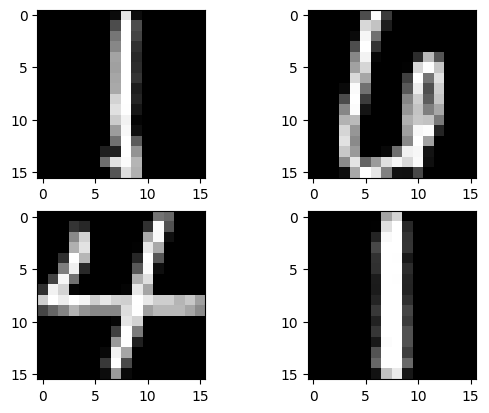

In [200]:
X_1 = np.reshape(X[:,9],(size,size))
plt.subplot(2,2,1)
plt.imshow(X_1,'gray')
X_2 = np.reshape(X[:,5],(size,size))
plt.subplot(2,2,2)
plt.imshow(X_2,'gray')
X_3 = np.reshape(X[:,23],(size,size))
plt.subplot(2,2,3)
plt.imshow(X_3,'gray')
X_4 = np.reshape(X[:,44],(size,size))
plt.subplot(2,2,4)
plt.imshow(X_4,'gray')
plt.show()

### Extracting a subset composed only by 3 and 4

In [201]:
N1 = 3
N2 = 4
idx = (Y[0,:] == N1) | (Y[0,:] == N2)
Y = Y[:, idx]
X = X[:, idx]
print(X.shape)

(256, 253)


### Splitting the subset into Training set and Test set

In [202]:
def train_test_split(X, Y, N_train):
    d,N = X.shape
    idx = np.arange(0, N)
    np.random.shuffle(idx)
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    X_train = X[:,train_idx]
    Y_train = Y[:,train_idx]
    X_test = X[:,test_idx]
    Y_test = Y[:,test_idx]
    return X_train,Y_train,X_test,Y_test
    
X_train,Y_train,X_test,Y_test = train_test_split(X, Y, 100)
q_train, w_train = X_train.shape
q_train, w_test = X_test.shape

### Splitting the Training set into classes C1 and C2

In [203]:
idx_1 = (Y_train[0,:] == N1)
C_1 = X_train[:, idx_1]
idx_2 = (Y_train[0,:] == N2)
C_2 = X_train[:, idx_2]

### Computing the SVD Decomposition of the two Training sets

In [204]:
U_1, s_1, VT_1 = np.linalg.svd(C_1, full_matrices=False)
U_2, s_2, VT_2 = np.linalg.svd(C_2, full_matrices=False)

### Extracting a random element "y" from the test set and computing the two projections


In [205]:
a = np.random.randint(1,w_test)
y = X_test[:,a-1:a]
y_1p = U_1 @ (U_1.T @ y)
y_2p = U_2 @ (U_2.T @ y)

### Misuring the distance of the element "y" from the two projections to determine the number 

In [206]:
d1 = np.linalg.norm(y - y_1p, 2)
d2 = np.linalg.norm(y - y_2p, 2)
print(f" Distance of Y_1 is {d1}")
print(f" Distance of Y_2 is {d2}")
if d1 < d2:
    print(f"It's a {N1}")
else:
    print(f"It's a {N2}")

 Distance of Y_1 is 3.8603860827340575
 Distance of Y_2 is 1.9075490317631898
It's a 4


### Visualizing the element "y"

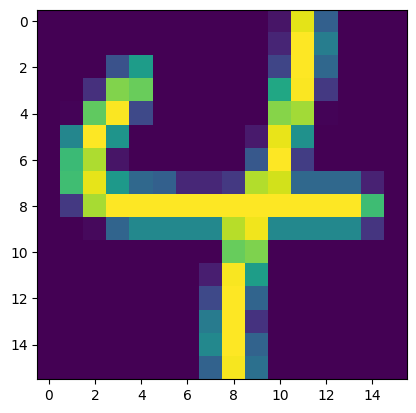

In [207]:
plt.imshow(np.reshape(y[:,0],(size,size)))
plt.show()

In [208]:
print(U_1.shape)

(256, 59)


In [209]:
misc_factor = 0
a = 0
for t in range(1,w_train):
    y = X_train[:,t-1:t]
    y_1p = U_1 @ (U_1.T @ y)
    y_2p = U_2 @ (U_2.T @ y)
    d1 = np.linalg.norm(y - y_1p, 2)
    d2 = np.linalg.norm(y - y_2p, 2)
    #print(d1,d2)
    if d1 < d2 :
        a = N1
    else:
        a = N2
    if a!= Y_train[0,t-1]:
        misc_factor +=1
        #print(a,Y_test[0,t])
misc_factor /= w_train
print(f"The misclassification rate for the training data is: {misc_factor}")

The misclassification rate for the training data is: 0.0


In [210]:
misc_factor = 0
a = 0
for t in range(1,w_test):
    y = X_test[:,t-1:t]
    y_1p = U_1 @ (U_1.T @ y)
    y_2p = U_2 @ (U_2.T @ y)
    d1 = np.linalg.norm(y - y_1p, 2)
    d2 = np.linalg.norm(y - y_2p, 2)
    #print(d1,d2)
    if d1 < d2 :
        a = N1
    else:
        a = N2
    if a!= Y_test[0,t-1]:
        misc_factor +=1
        #print(a,Y_test[0,t])
misc_factor /= w_test
print(f"The misclassification rate for the test data is: {misc_factor}")

The misclassification rate for the test data is: 0.006535947712418301
